#CSE 353 Fall 2021 Homework 5 Jeongyoon Lee(114133199)

In [1]:
import cv2
import numpy as  np
import matplotlib.pyplot as plt
from google.colab import drive
import glob
import math
import pandas as pd
from mlxtend.plotting import plot_decision_regions

#Check data information

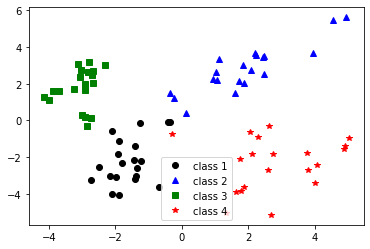

In [2]:
# check original data
for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 

for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",")
X = X.T 

c1 = 0
c2 = 0
c3 = 0
c4 = 0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 1):
    if(c1 == 0):
      plt.plot(x, y, 'o', color='black', label = 'class 1');
      c1 = 1
    else:
      plt.plot(x, y, 'o', color='black');
  elif(Y[i] == 2):
    if(c2 == 0):
      plt.plot(x, y, '^', color='blue', label = 'class 2');
      c2 = 1
    else:
      plt.plot(x, y, '^', color='blue');
  elif(Y[i] == 3):
    if(c3 == 0):
      plt.plot(x, y, 's', color='green', label = 'class 3');  
      c3 =1
    else:
      plt.plot(x, y, 's', color='green');
  else:
    if(c4 == 0):
      plt.plot(x, y, '*', color='red', label = 'class 4');
      c4 =1
    else:
      plt.plot(x, y, '*', color='red');
plt.legend()
plt.show()


#Part1 (One-Versus-All) Strategy

The difference between those codes are how to handle train data since there are OVA strategy and OVO strategy, and how to decide the class with g(x) values since their classifying method are different.(OVO with tourament campion, soft voting way). And the other algorithm; like the way how to calculate weight from logistic regression, and calculate g(x) are same. 

---class 1---
learning rate : 0.3, Iteration : 10
>>W_logisticRegression :  [-0.60074013 -0.34633614 -0.46152083]

---class 2---
learning rate : 0.3, Iteration : 10
>>W_logisticRegression :  [-0.57883505  0.4235541   0.63324912]

---class 3---
learning rate : 0.3, Iteration : 10
>>W_logisticRegression :  [-0.61649379 -0.66229669  0.39662046]

---class 4---
learning rate : 0.3, Iteration : 10
>>W_logisticRegression :  [-0.58958731  0.62259432 -0.49776097]

After classify :  [3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Number of error :  5
Error rate :  0.0625


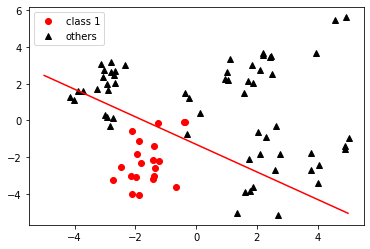

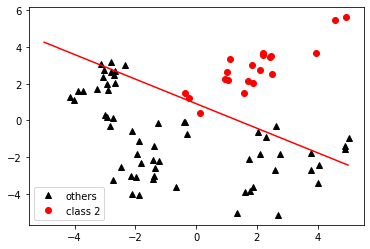

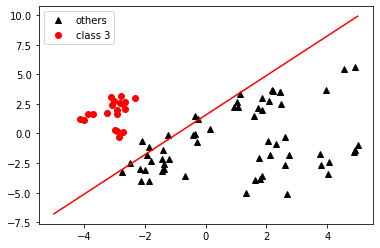

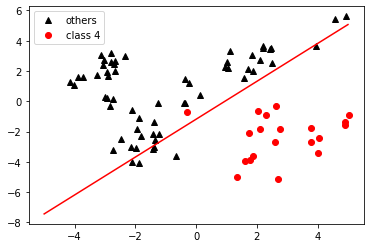

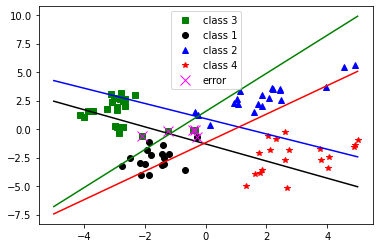

In [8]:
#Logistic Regression
#OVA Strategy with small iteration
def sigmoid(x):
  return 1/(1+np.exp(-x))

def logistic(W0, class_num):
  for i in range(len(X)):
    if(Y[i] == class_num): # if ground truth label is class_number, changed it to 1.
        Y[i] = 1
    else: # if ground truth label is not class_number, changed it to -1.
      Y[i] = -1
  for n in range(iteration_logistic):
    result = 0
    for i in range(len(X)):
      sig_parameter = (-1)*Y[i]* (W0.T) @ X[i]
      result_sig = sigmoid(sig_parameter)
      yn_xn = Y[i]*X[i]
      result = result + result_sig * yn_xn
    result = result /len(X)
    W0 = W0 + result *  learning_rate
    # print("error rate : ", np.sqrt(result.dot(result)))
  return W0 #find Weight from logistic regression






class_num =4 # number of class
total_arr = []

for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
X = X.T
print("---class 1---")
print("learning rate : 0.3, Iteration : 10")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 10
learning_rate = 0.3
#--------------------------------------#
W_logisticRegression = logistic(W0,1) #using weight from logistic regression
print(">>W_logisticRegression : ", W_logisticRegression)
g_x_logistic_Class1 = sigmoid(W_logisticRegression.T @ X.T)
total_arr.append(g_x_logistic_Class1)
print()   
if(W_logisticRegression[2] != 0 ): #for plot W 
  Wm = (W_logisticRegression[1]/W_logisticRegression[2])
  Wx = np.arange(-5, 5, 0.0001)
  Wy1 = [((-1)*Wm*num)-W_logisticRegression[0]/W_logisticRegression[2] for num in Wx]   


for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
X = X.T
print("---class 2---")
print("learning rate : 0.3, Iteration : 10")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 10
learning_rate = 0.3
#--------------------------------------#
W_logisticRegression = logistic(W0,2) 
print(">>W_logisticRegression : ", W_logisticRegression)
g_x_logistic_Class2 = sigmoid(W_logisticRegression.T @ X.T)
total_arr.append(g_x_logistic_Class2)
print()  
if(W_logisticRegression[2] != 0 ):
  Wm = (W_logisticRegression[1]/W_logisticRegression[2])
  Wx = np.arange(-5, 5, 0.0001)
  Wy2 = [((-1)*Wm*num)-W_logisticRegression[0]/W_logisticRegression[2] for num in Wx]    


for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
X = X.T
print("---class 3---")
print("learning rate : 0.3, Iteration : 10")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 10
learning_rate = 0.3
#--------------------------------------#
W_logisticRegression = logistic(W0,3) 
print(">>W_logisticRegression : ", W_logisticRegression)
g_x_logistic_Class3 = sigmoid(W_logisticRegression.T @ X.T)
total_arr.append(g_x_logistic_Class3)
print() 
if(W_logisticRegression[2] != 0 ):
  Wm = (W_logisticRegression[1]/W_logisticRegression[2])
  Wx = np.arange(-5, 5, 0.0001)
  Wy3 = [((-1)*Wm*num)-W_logisticRegression[0]/W_logisticRegression[2] for num in Wx]     


for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
X = X.T
print("---class 4---")
print("learning rate : 0.3, Iteration : 10")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 10
learning_rate = 0.3
#--------------------------------------#
W_logisticRegression = logistic(W0,4) 
print(">>W_logisticRegression : ", W_logisticRegression)
g_x_logistic_Class4 = sigmoid(W_logisticRegression.T @ X.T)
total_arr.append(g_x_logistic_Class4)
print()   
if(W_logisticRegression[2] != 0 ):
  Wm = (W_logisticRegression[1]/W_logisticRegression[2])
  Wx = np.arange(-5, 5, 0.0001)
  Wy4 = [((-1)*Wm*num)-W_logisticRegression[0]/W_logisticRegression[2] for num in Wx]   

# print(total_arr)
# print(np.array(total_arr).T)

# to check error
error_X = []
error_Y = []
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
total_arr = np.array(total_arr).T
max_index = []
error_count = 0
for i in range(len(X)):
  max_index.insert(i,np.argmax(total_arr[i])+1) # total classified label, find most biggest g(x) among classes
  if(Y[i] != np.argmax(total_arr[i])+1):
    # print(Y[i], np.argmax(total_arr[i]))
    error_count += 1
    error_X.insert(error_count, X[i])
    error_Y.insert(error_count, max_index[i])

print("After classify : ",max_index)  
print("Number of error : ",error_count)
print("Error rate : ",error_count/len(X))

#Class 1 plot
xx=0
yy=0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 1):
    if(xx == 0):
      plt.plot(x, y, 'o', color='red', label = 'class 1'); #for legend
      xx =1
    else:
      plt.plot(x, y, 'o', color='red');
  else:
    if(yy == 0):
      plt.plot(x, y, '^', color='black',label = 'others');
      yy =1
    else: 
      plt.plot(x, y, '^', color='black');
plt.plot(Wx, Wy1,'-',color='red')
plt.legend()
plt.show()

#Class 2 plot
xx=0
yy=0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 2):
    if(xx == 0):
      plt.plot(x, y, 'o', color='red', label = 'class 2');
      xx =1
    else:
      plt.plot(x, y, 'o', color='red');
  else:
    if(yy == 0):
      plt.plot(x, y, '^', color='black',label = 'others');
      yy =1
    else: 
      plt.plot(x, y, '^', color='black');
plt.plot(Wx, Wy2,'-',color='red')
plt.legend()
plt.show()

#Class 3 plot
xx=0
yy=0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 3):
    if(xx == 0):
      plt.plot(x, y, 'o', color='red', label = 'class 3');
      xx =1
    else:
      plt.plot(x, y, 'o', color='red');
  else:
    if(yy == 0):
      plt.plot(x, y, '^', color='black',label = 'others');
      yy =1
    else: 
      plt.plot(x, y, '^', color='black');
plt.plot(Wx, Wy3,'-',color='red')
plt.legend()
plt.show()

#Class 4 plot
xx=0
yy=0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 4):
    if(xx == 0):
      plt.plot(x, y, 'o', color='red', label = 'class 4');
      xx =1
    else:
      plt.plot(x, y, 'o', color='red');
  else:
    if(yy == 0):
      plt.plot(x, y, '^', color='black',label = 'others');
      yy =1
    else: 
      plt.plot(x, y, '^', color='black');
plt.plot(Wx, Wy4,'-',color='red')
plt.legend()
plt.show()

#total plot print
c1 = 0
c2 = 0
c3 = 0
c4 = 0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(max_index[i] == 1):
    if(c1 == 0):
      plt.plot(x, y, 'o', color='black', label = 'class 1');
      c1 = 1
    else:
      plt.plot(x, y, 'o', color='black');
  elif(max_index[i] == 2):
    if(c2 == 0):
      plt.plot(x, y, '^', color='blue', label = 'class 2');
      c2 = 1
    else:
      plt.plot(x, y, '^', color='blue');
  elif(max_index[i] == 3):
    if(c3 == 0):
      plt.plot(x, y, 's', color='green', label = 'class 3');  
      c3 =1
    else:
      plt.plot(x, y, 's', color='green');
  else:
    if(c4 == 0):
      plt.plot(x, y, '*', color='red', label = 'class 4');
      c4 =1
    else:
      plt.plot(x, y, '*', color='red');
plt.plot(Wx, Wy1,color='black')
plt.plot(Wx, Wy2,color='blue')
plt.plot(Wx, Wy3,color='green')
plt.plot(Wx, Wy4,color='red')
error_cnt = 0
#error print
for i in range(len(error_X)):
  if(error_cnt == 0):
    plt.plot(error_X[i][1], error_X[i][2],'x',markersize = 10,color = 'magenta', label = 'error')
    error_cnt = 1
  else:
    plt.plot(error_X[i][1], error_X[i][2],'x',markersize = 10,color = 'magenta')
plt.legend()
plt.show()



---class 1---
learning rate : 0.3, Iteration : 1000
>>W_logisticRegression :  [-3.2518306  -1.07539567 -1.16891627]

---class 2---
learning rate : 0.3, Iteration : 1000
>>W_logisticRegression :  [-3.87846543  1.18206691  2.10553032]

---class 3---
learning rate : 0.3, Iteration : 1000
>>W_logisticRegression :  [-5.66594184 -2.72503404  1.71015994]

---class 4---
learning rate : 0.3, Iteration : 1000
>>W_logisticRegression :  [-4.16423785  2.16364695 -1.54497577]

After classify :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Number of error :  1
Error rate :  0.0125


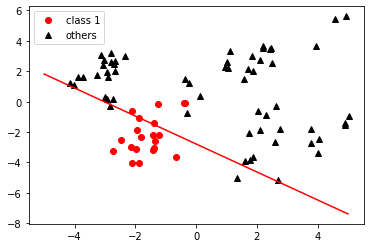

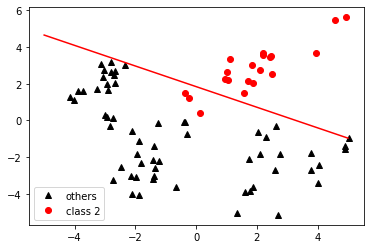

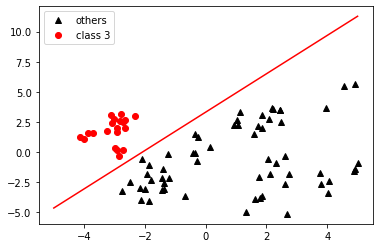

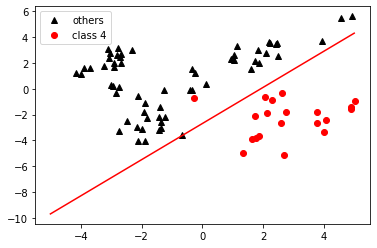

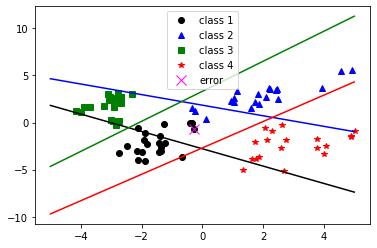

In [9]:
#Logistic Regression
#OVA with large iteration
def sigmoid(x):
  return 1/(1+np.exp(-x))

def logistic(W0, class_num):
  for i in range(len(X)):
    if(Y[i] == class_num):
        Y[i] = 1
    else:
      Y[i] = -1
  for n in range(iteration_logistic):
    result = 0
    for i in range(len(X)):
      sig_parameter = (-1)*Y[i]* (W0.T) @ X[i]
      result_sig = sigmoid(sig_parameter)
      yn_xn = Y[i]*X[i]
      result = result + result_sig * yn_xn
    result = result /len(X)
    W0 = W0 + result *  learning_rate
    # print("error rate : ", np.sqrt(result.dot(result)))
  return W0






class_num =4 # number of class
total_arr = []

for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
X = X.T
print("---class 1---")
print("learning rate : 0.3, Iteration : 1000")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 1000
learning_rate = 0.3
#--------------------------------------#
W_logisticRegression = logistic(W0,1) 
print(">>W_logisticRegression : ", W_logisticRegression)
g_x_logistic_Class1 = sigmoid(W_logisticRegression.T @ X.T)
total_arr.append(g_x_logistic_Class1)
print()   
if(W_logisticRegression[2] != 0 ):
  Wm = (W_logisticRegression[1]/W_logisticRegression[2])
  Wx = np.arange(-5, 5, 0.0001)
  Wy1 = [((-1)*Wm*num)-W_logisticRegression[0]/W_logisticRegression[2] for num in Wx]   


for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
X = X.T
print("---class 2---")
print("learning rate : 0.3, Iteration : 1000")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 1000
learning_rate = 0.3
#--------------------------------------#
W_logisticRegression = logistic(W0,2) 
print(">>W_logisticRegression : ", W_logisticRegression)
g_x_logistic_Class2 = sigmoid(W_logisticRegression.T @ X.T)
total_arr.append(g_x_logistic_Class2)
print()  
if(W_logisticRegression[2] != 0 ):
  Wm = (W_logisticRegression[1]/W_logisticRegression[2])
  Wx = np.arange(-5, 5, 0.0001)
  Wy2 = [((-1)*Wm*num)-W_logisticRegression[0]/W_logisticRegression[2] for num in Wx]    


for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
X = X.T
print("---class 3---")
print("learning rate : 0.3, Iteration : 1000")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 1000
learning_rate = 0.3
#--------------------------------------#
W_logisticRegression = logistic(W0,3) 
print(">>W_logisticRegression : ", W_logisticRegression)
g_x_logistic_Class3 = sigmoid(W_logisticRegression.T @ X.T)
total_arr.append(g_x_logistic_Class3)
print() 
if(W_logisticRegression[2] != 0 ):
  Wm = (W_logisticRegression[1]/W_logisticRegression[2])
  Wx = np.arange(-5, 5, 0.0001)
  Wy3 = [((-1)*Wm*num)-W_logisticRegression[0]/W_logisticRegression[2] for num in Wx]     


for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
X = X.T
print("---class 4---")
print("learning rate : 0.3, Iteration : 1000")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 1000
learning_rate = 0.3
#--------------------------------------#
W_logisticRegression = logistic(W0,4) 
print(">>W_logisticRegression : ", W_logisticRegression)
g_x_logistic_Class4 = sigmoid(W_logisticRegression.T @ X.T)
total_arr.append(g_x_logistic_Class4)
print()   
if(W_logisticRegression[2] != 0 ):
  Wm = (W_logisticRegression[1]/W_logisticRegression[2])
  Wx = np.arange(-5, 5, 0.0001)
  Wy4 = [((-1)*Wm*num)-W_logisticRegression[0]/W_logisticRegression[2] for num in Wx]   

# print(total_arr)
# print(np.array(total_arr).T)
error_X = []
error_Y = []
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
total_arr = np.array(total_arr).T
max_index = []
error_count = 0
for i in range(len(X)):
  max_index.insert(i,np.argmax(total_arr[i])+1)
  if(Y[i] != np.argmax(total_arr[i])+1):
    # print(Y[i], np.argmax(total_arr[i]))
    error_count += 1
    error_X.insert(error_count, X[i])
    error_Y.insert(error_count, max_index[i])

print("After classify : ",max_index)  
print("Number of error : ",error_count)
print("Error rate : ",error_count/len(X))

#Class 1 plot
xx=0
yy=0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 1):
    if(xx == 0):
      plt.plot(x, y, 'o', color='red', label = 'class 1');
      xx =1
    else:
      plt.plot(x, y, 'o', color='red');
  else:
    if(yy == 0):
      plt.plot(x, y, '^', color='black',label = 'others');
      yy =1
    else: 
      plt.plot(x, y, '^', color='black');
plt.plot(Wx, Wy1,'-',color='red')
plt.legend()
plt.show()

#Class 2 plot
xx=0
yy=0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 2):
    if(xx == 0):
      plt.plot(x, y, 'o', color='red', label = 'class 2');
      xx =1
    else:
      plt.plot(x, y, 'o', color='red');
  else:
    if(yy == 0):
      plt.plot(x, y, '^', color='black',label = 'others');
      yy =1
    else: 
      plt.plot(x, y, '^', color='black');
plt.plot(Wx, Wy2,'-',color='red')
plt.legend()
plt.show()

#Class 3 plot
xx=0
yy=0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 3):
    if(xx == 0):
      plt.plot(x, y, 'o', color='red', label = 'class 3');
      xx =1
    else:
      plt.plot(x, y, 'o', color='red');
  else:
    if(yy == 0):
      plt.plot(x, y, '^', color='black',label = 'others');
      yy =1
    else: 
      plt.plot(x, y, '^', color='black');
plt.plot(Wx, Wy3,'-',color='red')
plt.legend()
plt.show()

#Class 4 plot
xx=0
yy=0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 4):
    if(xx == 0):
      plt.plot(x, y, 'o', color='red', label = 'class 4');
      xx =1
    else:
      plt.plot(x, y, 'o', color='red');
  else:
    if(yy == 0):
      plt.plot(x, y, '^', color='black',label = 'others');
      yy =1
    else: 
      plt.plot(x, y, '^', color='black');
plt.plot(Wx, Wy4,'-',color='red')
plt.legend()
plt.show()

#total plot print
c1 = 0
c2 = 0
c3 = 0
c4 = 0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(max_index[i] == 1):
    if(c1 == 0):
      plt.plot(x, y, 'o', color='black', label = 'class 1');
      c1 = 1
    else:
      plt.plot(x, y, 'o', color='black');
  elif(max_index[i] == 2):
    if(c2 == 0):
      plt.plot(x, y, '^', color='blue', label = 'class 2');
      c2 = 1
    else:
      plt.plot(x, y, '^', color='blue');
  elif(max_index[i] == 3):
    if(c3 == 0):
      plt.plot(x, y, 's', color='green', label = 'class 3');  
      c3 =1
    else:
      plt.plot(x, y, 's', color='green');
  else:
    if(c4 == 0):
      plt.plot(x, y, '*', color='red', label = 'class 4');
      c4 =1
    else:
      plt.plot(x, y, '*', color='red');
plt.plot(Wx, Wy1,color='black')
plt.plot(Wx, Wy2,color='blue')
plt.plot(Wx, Wy3,color='green')
plt.plot(Wx, Wy4,color='red')
error_cnt = 0
for i in range(len(error_X)):
  if(error_cnt ==0):
    plt.plot(error_X[i][1], error_X[i][2],'x',markersize = 10,color = 'magenta', label = 'error')  
    error_cnt = 1
  else:
    plt.plot(error_X[i][1], error_X[i][2],'x',markersize = 10,color = 'magenta')
plt.legend()
plt.show()



#Part2 (One-Versus-One) Strategy

---class 1---
learning rate : 0.3, Iteration : 10
>>W_logisticRegression for class (1, 2 ) :  [ 0.03516043 -0.62313168 -0.88665707]
>>W_logisticRegression for class (1, 3 ) :  [ 0.11751909  0.28980418 -1.0623112 ]
>>W_logisticRegression for class (1, 4 ) :  [ 0.08139701 -1.14546976 -0.05465102]

---class 2---
learning rate : 0.3, Iteration : 10
>>W_logisticRegression for class (2, 1 ) :  [-0.03516043  0.62313168  0.88665707]
>>W_logisticRegression for class (2, 3 ) :  [0.07505208 1.10150708 0.24447151]
>>W_logisticRegression for class (2, 4 ) :  [ 0.026313   -0.25127259  1.11257528]

---class 3---
learning rate : 0.3, Iteration : 10
>>W_logisticRegression for class (3, 1 ) :  [-0.11751909 -0.28980418  1.0623112 ]
>>W_logisticRegression for class (3, 2 ) :  [-0.07505208 -1.10150708 -0.24447151]
>>W_logisticRegression for class (3, 4 ) :  [-0.02247642 -0.87067221  0.58857694]

---class 4---
learning rate : 0.3, Iteration : 10
>>W_logisticRegression for class (4, 1 ) :  [-0.08139701  1.14

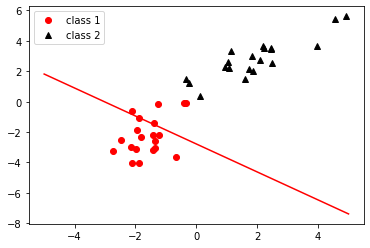

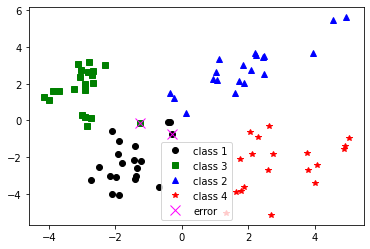

In [10]:
#Logistic Regression
#OVO Strategy with small iteration
def sigmoid(x):
  return 1/(1+np.exp(-x))

def logistic(W0, class_num,second): # (class_num , second) pair since it is OVO
  for f in glob.glob( "X(2).txt"):
    X = np.loadtxt(f,delimiter=",") 
  for f in glob.glob( "Y(2).txt"):
    Y  = np.loadtxt(f,delimiter=",") 
  X = X.T
  index = 0
  delete_Y = np.where(((Y != class_num) & (Y != second)))
  Y = np.delete(Y, np.where(((Y != class_num) & (Y != second))))
  X = np.delete(X, delete_Y,0)

  for i in range(len(X)):
    if(Y[i] == class_num): # if ground truth label is class number, label to 1
        Y[i] = 1
    else: # if ground truth label is second, label to -1
      Y[i] = -1
  for n in range(iteration_logistic):
    result = 0
    for i in range(len(X)):
      sig_parameter = (-1)*Y[i]* (W0.T) @ X[i]
      result_sig = sigmoid(sig_parameter)
      yn_xn = Y[i]*X[i]
      result = result + result_sig * yn_xn
    result = result /len(X)
    W0 = W0 + result *  learning_rate
    # print("error rate : ", np.sqrt(result.dot(result)))
  return W0





class_num =4 # number of class
total_arr = []

print("---class 1---")
#(1,2),(1,3),(1,4)
print("learning rate : 0.3, Iteration : 10")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 10
learning_rate = 0.3
#--------------------------------------#
second_arr = [2,3,4]
class1_arr = []
for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y  = np.loadtxt(f,delimiter=",") 
X = X.T
for second in second_arr:
  W_logisticRegression = logistic(W0,1,second) 
  print(">>W_logisticRegression for class (1,",second,") : ", W_logisticRegression)
  g_x_logistic_Class1 = sigmoid(W_logisticRegression.T @ X.T)
  class1_arr.append(g_x_logistic_Class1)
# print(">>W_logisticRegression : ", W_logisticRegression)
class1_arr = sum(class1_arr) #should sum g(x)
total_arr.append(class1_arr)
print()   

print("---class 2---")
print("learning rate : 0.3, Iteration : 10")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 10
learning_rate = 0.3
#--------------------------------------#
second_arr = [1,3,4]
class2_arr = []
for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y  = np.loadtxt(f,delimiter=",") 
X = X.T
for second in second_arr:
  W_logisticRegression = logistic(W0,2,second) 
  print(">>W_logisticRegression for class (2,",second,") : ", W_logisticRegression)
  g_x_logistic_Class2 = sigmoid(W_logisticRegression.T @ X.T)
  class2_arr.append(g_x_logistic_Class2)
# print(">>W_logisticRegression : ", W_logisticRegression)
class2_arr = sum(class2_arr)
total_arr.append(class2_arr)
print()  

print("---class 3---")
print("learning rate : 0.3, Iteration : 10")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 10
learning_rate = 0.3
#--------------------------------------#
second_arr = [1,2,4]
class3_arr = []
for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y  = np.loadtxt(f,delimiter=",") 
X = X.T
for second in second_arr:
  W_logisticRegression = logistic(W0,3,second) 
  print(">>W_logisticRegression for class (3,",second,") : ", W_logisticRegression)
  g_x_logistic_Class3 = sigmoid(W_logisticRegression.T @ X.T)
  class3_arr.append(g_x_logistic_Class3)
# print(">>W_logisticRegression : ", W_logisticRegression)
class3_arr = sum(class3_arr)
total_arr.append(class3_arr)
print()   

print("---class 4---")
print("learning rate : 0.3, Iteration : 10")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 10
learning_rate = 0.3
#--------------------------------------#
second_arr = [1,2,3]
class4_arr = []
for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y  = np.loadtxt(f,delimiter=",") 
X = X.T
for second in second_arr:
  W_logisticRegression = logistic(W0,4,second) 
  print(">>W_logisticRegression for class (4,",second,") : ", W_logisticRegression)
  g_x_logistic_Class4 = sigmoid(W_logisticRegression.T @ X.T)
  class4_arr.append(g_x_logistic_Class4)
# print(">>W_logisticRegression : ", W_logisticRegression)
class4_arr = sum(class4_arr)
total_arr.append(class4_arr)
print()  

# print(total_arr)
error_X = []
error_Y = []
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
total_arr = np.array(total_arr).T
max_index = []
error_count = 0
for i in range(len(X)):
  max_index.insert(i,np.argmax(total_arr[i])+1)
  if(Y[i] != np.argmax(total_arr[i])+1):
    error_count += 1
    error_X.insert(error_count, X[i])
    error_Y.insert(error_count, max_index[i])

print("After classify : ",max_index)  
print("Number of error : ",error_count)
print("Error rate : ",error_count/len(X))


#Class (1,2) plot
xx=0
yy=0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 1):
    if(xx == 0):
      plt.plot(x, y, 'o', color='red', label = 'class 1');
      xx =1
    else:
      plt.plot(x, y, 'o', color='red');
  elif(Y[i] ==2):
    if(yy == 0):
      plt.plot(x, y, '^', color='black',label = 'class 2');
      yy =1
    else: 
      plt.plot(x, y, '^', color='black');
plt.plot(Wx, Wy1,'-',color='red')
plt.legend()
plt.show()


#total plot print
c1 = 0
c2 = 0
c3 = 0
c4 = 0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(max_index[i] == 1):
    if(c1 == 0):
      plt.plot(x, y, 'o', color='black', label = 'class 1');
      c1 = 1
    else:
      plt.plot(x, y, 'o', color='black');
  elif(max_index[i] == 2):
    if(c2 == 0):
      plt.plot(x, y, '^', color='blue', label = 'class 2');
      c2 = 1
    else:
      plt.plot(x, y, '^', color='blue');
  elif(max_index[i] == 3):
    if(c3 == 0):
      plt.plot(x, y, 's', color='green', label = 'class 3');  
      c3 =1
    else:
      plt.plot(x, y, 's', color='green');
  else:
    if(c4 == 0):
      plt.plot(x, y, '*', color='red', label = 'class 4');
      c4 =1
    else:
      plt.plot(x, y, '*', color='red');
error_cnt = 0      
for i in range(len(error_X)):
  if(error_cnt == 0):
    plt.plot(error_X[i][1], error_X[i][2],'x',markersize = 10,color = 'magenta', label = 'error')
    error_cnt = 1
  else:
    plt.plot(error_X[i][1], error_X[i][2],'x',markersize = 10,color = 'magenta')
plt.legend()
plt.show()


---class 1---
learning rate : 0.3, Iteration : 1000
>>W_logisticRegression for class (1, 2 ) :  [ 0.51600938 -2.70440182 -3.76866182]
>>W_logisticRegression for class (1, 3 ) :  [ 3.47889996  2.12836091 -4.01459391]
>>W_logisticRegression for class (1, 4 ) :  [-0.34393352 -3.9736074   0.03069733]

---class 2---
learning rate : 0.3, Iteration : 1000
>>W_logisticRegression for class (2, 1 ) :  [-0.51600938  2.70440182  3.76866182]
>>W_logisticRegression for class (2, 3 ) :  [2.19566433 3.90612169 1.15833484]
>>W_logisticRegression for class (2, 4 ) :  [ 0.36236255 -1.09926136  4.22472994]

---class 3---
learning rate : 0.3, Iteration : 1000
>>W_logisticRegression for class (3, 1 ) :  [-3.47889996 -2.12836091  4.01459391]
>>W_logisticRegression for class (3, 2 ) :  [-2.19566433 -3.90612169 -1.15833484]
>>W_logisticRegression for class (3, 4 ) :  [-1.26911763 -2.15985529  2.07715526]

---class 4---
learning rate : 0.3, Iteration : 1000
>>W_logisticRegression for class (4, 1 ) :  [ 0.343933

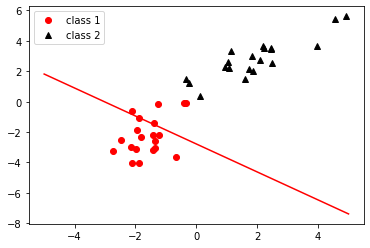

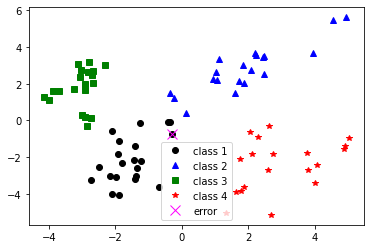

In [11]:
#Logistic Regression
#OVO with large iteration

def sigmoid(x):
  return 1/(1+np.exp(-x))

def logistic(W0, class_num,second):
  for f in glob.glob( "X(2).txt"):
    X = np.loadtxt(f,delimiter=",") 
  for f in glob.glob( "Y(2).txt"):
    Y  = np.loadtxt(f,delimiter=",") 
  X = X.T
  index = 0
  delete_Y = np.where(((Y != class_num) & (Y != second)))
  Y = np.delete(Y, np.where(((Y != class_num) & (Y != second))))
  X = np.delete(X, delete_Y,0)

  for i in range(len(X)):
    if(Y[i] == class_num):
        Y[i] = 1
    else:
      Y[i] = -1
  for n in range(iteration_logistic):
    result = 0
    for i in range(len(X)):
      sig_parameter = (-1)*Y[i]* (W0.T) @ X[i]
      result_sig = sigmoid(sig_parameter)
      yn_xn = Y[i]*X[i]
      result = result + result_sig * yn_xn
    result = result /len(X)
    W0 = W0 + result *  learning_rate
    # print("error rate : ", np.sqrt(result.dot(result)))
  return W0





class_num =4 # number of class
total_arr = []

print("---class 1---")
#(1,2),(1,3),(1,4)
print("learning rate : 0.3, Iteration : 1000")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 1000
learning_rate = 0.3
#--------------------------------------#
second_arr = [2,3,4]
class1_arr = []
for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y  = np.loadtxt(f,delimiter=",") 
X = X.T
for second in second_arr:
  W_logisticRegression = logistic(W0,1,second) 
  print(">>W_logisticRegression for class (1,",second,") : ", W_logisticRegression)
  g_x_logistic_Class1 = sigmoid(W_logisticRegression.T @ X.T)
  class1_arr.append(g_x_logistic_Class1)
# print(">>W_logisticRegression : ", W_logisticRegression)
class1_arr = sum(class1_arr)
total_arr.append(class1_arr)
print()   

print("---class 2---")
print("learning rate : 0.3, Iteration : 1000")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 1000
learning_rate = 0.3
#--------------------------------------#
second_arr = [1,3,4]
class2_arr = []
for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y  = np.loadtxt(f,delimiter=",") 
X = X.T
for second in second_arr:
  W_logisticRegression = logistic(W0,2,second) 
  print(">>W_logisticRegression for class (2,",second,") : ", W_logisticRegression)
  g_x_logistic_Class2 = sigmoid(W_logisticRegression.T @ X.T)
  class2_arr.append(g_x_logistic_Class2)
# print(">>W_logisticRegression : ", W_logisticRegression)
class2_arr = sum(class2_arr)
total_arr.append(class2_arr)
print()  

print("---class 3---")
print("learning rate : 0.3, Iteration : 1000")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 1000
learning_rate = 0.3
#--------------------------------------#
second_arr = [1,2,4]
class3_arr = []
for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y  = np.loadtxt(f,delimiter=",") 
X = X.T
for second in second_arr:
  W_logisticRegression = logistic(W0,3,second)
  print(">>W_logisticRegression for class (3,",second,") : ", W_logisticRegression) 
  g_x_logistic_Class3 = sigmoid(W_logisticRegression.T @ X.T)
  class3_arr.append(g_x_logistic_Class3)
# print(">>W_logisticRegression : ", W_logisticRegression)
class3_arr = sum(class3_arr)
total_arr.append(class3_arr)
print()   

print("---class 4---")
print("learning rate : 0.3, Iteration : 1000")
#-----------Hyper Parameter------------#
W0 = np.array([0,0,0])
result_sig =0
iteration_logistic = 1000
learning_rate = 0.3
#--------------------------------------#
second_arr = [1,2,3]
class4_arr = []
for f in glob.glob( "X(2).txt"):
  X = np.loadtxt(f,delimiter=",") 
for f in glob.glob( "Y(2).txt"):
  Y  = np.loadtxt(f,delimiter=",") 
X = X.T
for second in second_arr:
  W_logisticRegression = logistic(W0,4,second) 
  print(">>W_logisticRegression for class (4,",second,") : ", W_logisticRegression)
  g_x_logistic_Class4 = sigmoid(W_logisticRegression.T @ X.T)
  class4_arr.append(g_x_logistic_Class4)
# print(">>W_logisticRegression : ", W_logisticRegression)
class4_arr = sum(class4_arr)
total_arr.append(class4_arr)
print()  

# print(total_arr)
error_X = []
error_Y = []
for f in glob.glob( "Y(2).txt"):
  Y = np.loadtxt(f,delimiter=",") 
total_arr = np.array(total_arr).T
max_index = []
error_count = 0
for i in range(len(X)):
  max_index.insert(i,np.argmax(total_arr[i])+1)
  if(Y[i] != np.argmax(total_arr[i])+1):
    error_count += 1
    error_X.insert(error_count, X[i])
    error_Y.insert(error_count, max_index[i])

print("After classify : ",max_index)  
print("Number of error : ",error_count)
print("Error rate : ",error_count/len(X))


#Class (1,2) plot
xx=0
yy=0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(Y[i] == 1):
    if(xx == 0):
      plt.plot(x, y, 'o', color='red', label = 'class 1');
      xx =1
    else:
      plt.plot(x, y, 'o', color='red');
  elif(Y[i] ==2):
    if(yy == 0):
      plt.plot(x, y, '^', color='black',label = 'class 2');
      yy =1
    else: 
      plt.plot(x, y, '^', color='black');
plt.plot(Wx, Wy1,'-',color='red')
plt.legend()
plt.show()


#total plot print
c1 = 0
c2 = 0
c3 = 0
c4 = 0
for i in range(len(X)):
  x = X[i][1]; 
  y = X[i][2];
  plt.scatter
  if(max_index[i] == 1):
    if(c1 == 0):
      plt.plot(x, y, 'o', color='black', label = 'class 1');
      c1 = 1
    else:
      plt.plot(x, y, 'o', color='black');
  elif(max_index[i] == 2):
    if(c2 == 0):
      plt.plot(x, y, '^', color='blue', label = 'class 2');
      c2 = 1
    else:
      plt.plot(x, y, '^', color='blue');
  elif(max_index[i] == 3):
    if(c3 == 0):
      plt.plot(x, y, 's', color='green', label = 'class 3');  
      c3 =1
    else:
      plt.plot(x, y, 's', color='green');
  else:
    if(c4 == 0):
      plt.plot(x, y, '*', color='red', label = 'class 4');
      c4 =1
    else:
      plt.plot(x, y, '*', color='red');
error_cnt = 0      
for i in range(len(error_X)):
  if(error_cnt == 0):
    plt.plot(error_X[i][1], error_X[i][2],'x',markersize = 10,color = 'magenta', label = 'error')
    error_cnt = 1
  else:
    plt.plot(error_X[i][1], error_X[i][2],'x',markersize = 10,color = 'magenta')
plt.legend()
plt.show()
